# 实验内容描述

## 实验要求
### 截止日期：10月22日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

In [3]:
# 引入头文件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset
path = '/content/drive/MyDrive/ML/winequality-white.csv'
data = pd.read_csv(path)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 数据处理方法

对于非标准化的数据(具有一定分布)，我们通常为加速收敛速度以及减少极端数据对于模型的影响，通常选择会对数据进行预处理工作，将其变换为较小的数据形态，这样做的好处是其对于模型参数的敏感程度大大降低，较大或者较小的数据对于结果的影响，在模型参数相同的情况下会变得小很多，这样提高了模型参数的鲁棒性。有几种比较典型的数据处理办法，例如中心化，标准化，归一化等，np中有自带的标准化函数，不过在这里，我们考虑自己实现对应的函数，在这里，我们先介绍上述三种方法：

## 中心化

中心化是一种简单的数据预处理方法，主要目的是移除数据的平均值，使得新数据的均值为0。具体地说，中心化就是将每一个数据点减去整个数据集的平均值。对于向量形式的数据 $ \mathbf{x} $，中心化的计算公式为：

$$
\mathbf{x}_{\text{centered}} = \mathbf{x} - \mu
$$

其中，$ \mu $ 是数据 $ \mathbf{x} $ 的均值。

### 优点：

1. 将数据的均值移动到0，这有助于解释模型参数，特别是截距。
2. 有助于数值稳定性，特别是当数据的原始均值远离0时。

### 缺点：

1. 只移除了均值，不会对数据的分布范围进行调整。

## 标准化

标准化是将数据进行中心化后再进行缩放，以使其标准差为1。标准化的计算公式为：

$$
\mathbf{x}_{\text{standardized}} = \frac{ \mathbf{x} - \mu}{\sigma}
$$

其中，$ \mu $ 是数据 $ \mathbf{x} $ 的均值，$ \sigma $ 是数据的标准差。

### 优点：

1. 数据的均值为0，标准差为1，有助于解释模型参数。
2. 有助于数值稳定性。
3. 多个特征之间可以在相同的尺度上进行比较。

### 缺点：

1. 如果数据的原始分布不是正态的，标准化后的数据也可能不是正态的。

## 归一化

归一化是将数据的范围缩放到 [0, 1] 或 [-1, 1]。最常见的归一化方法是将数据缩放到 [0, 1]，其计算公式为：

$$
\mathbf{x}_{\text{normalized}} = \frac{\mathbf{x} - \text{min}(\mathbf{x})}{\text{max}(\mathbf{x}) - \text{min}(\mathbf{x})}
$$

### 优点：

1. 数据的范围被限定在一个固定的区间内，有助于数值稳定性。
2. 当我们知道数据的边界或想要将数据缩放到特定的范围时，归一化是很有用的。

### 缺点：

1. 归一化对异常值很敏感，一个小的异常值可能导致所有数据的缩放都受到影响。

在实际应用中，选择哪种预处理方法取决于具体的数据属性和模型需求。在这里，我们考虑对参数进行归一化


In [5]:
# 数据预处理(数据归一化)
def Normaliaztion(x):
    x = (x - np.mean(x,0))/(np.max(x,0)-np.min(x,0))
    return x

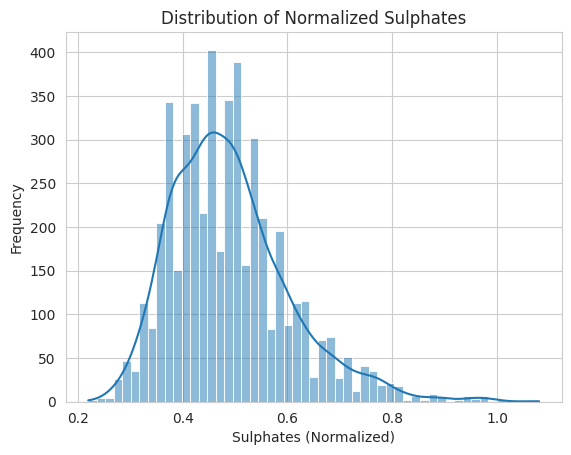

In [6]:
# show figure
X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1]
sns.set_style("whitegrid")
sns.histplot(X["sulphates"], kde=True)
plt.xlabel('Sulphates (Normalized)')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Sulphates')
plt.show()

# 实验思路

本次实验既然与回归相关，我们自然首先考虑实现多元线性回归：本数据集是葡萄的若干特征与其品质的数据集；我们可以将葡萄的若干特征视为自变量，将其品质作为因变量，那么我们就可以考虑一个多元函数。我们假定$h_\theta$为葡萄的品质，其具有若干的特性$ \mathbf{x}=[x_1,x_2...x_n] $，具体而言，第i个特征我们记为$x_i$，我们考虑一个不同特性对于品质的影响程度(权重)不同，我们为每一个品质分配一个权重，记为($\theta_i$)。我们记所有的$\theta$构成一个矩阵$\theta^T=[\theta_1,\theta_2...\theta_n]$，那么我们有以下式子成立：

$$h_\theta (\mathbf{x})=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T \mathbf{x}+\theta_0$$

在式中，$\theta_0$是偏置项，我们考虑$\theta_0$是单独出现的，并不方便进行矩阵运算，于是我们可以考虑将其防放入矩阵内：那么我们重新定义两个矩阵(向量)：

$$ \mathbf{x}=[1,x_1,x_2...x_n] $$
$$\theta^T=[\theta_0,\theta_1,\theta_2...\theta_n]$$

那么在重新定义后，我们便有了以下内容：

$$h_\theta (\mathbf{x})=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T \mathbf{x}$$

这样，极大程度上减少了计算的复杂度，使整体的多元线性回归的形式变为了矩阵的相乘。我们继续考虑整体的过程，事实上，我们进行回归是监督学习的一种，用已经存在的部分数据建立一个模型，使其能够在未知的数据上具有一定的鲁棒性，我们看上述公式，事实上，由于$\mathbf{x}$是给出的，唯一的变量即为$\theta$，我们通过已知数据学习优化的对象便至此明确，优化的对象是**$\theta$向量**！

只要知道了优化目标，该部分就不难完成，我们接下来考虑的问题便是应当如何优化呢？我们的的目的是让误差越来越小，换言之，我们通过已有的数据进行不断的迭代尝试，优化其中的参数，使其通过模型计算出的结果接近于我们已知的数据，我们可以定义损失函数：

$$Loss=\frac{1}{n}\sum_{i=1}^n(y_i-h_\theta(\pmb{\mathbf{x_i}}))^2$$

我们的目的是让Loss越小越好，Loss越小，说明我们预测值($h_\theta(x_i)$)与已知值($y_i$)越接近，那么我们接下来的任务就是考虑如何使其变小，我们可以认为损失函数$Loss(\mathbf{x},\theta)$是一个有关于$\theta$多元函数（因为$\mathbf{x}$是给出的，可以认为是一个常量），我们考虑对其求偏导：
$$
\frac{\partial Loss}{\partial \theta_j} = \frac{2}{n} \sum_{i=1}^n (y_i -  \theta^T \mathbf{x_i}) (-x_{ij})
$$

整理上述表达式，我们得到：

$$
\frac{\partial Loss}{\partial \theta_j} = -\frac{2}{n} \sum_{i=1}^n x_{ij} (y_i - \theta^T \mathbf{x_i})
$$

在上述表达式中$\theta_j$为第$j$个参数，一共有$n$个训练数据，那么我们$\mathbf{x_i}$就是第$i$组数据的对应的特征向量。

最后我们优化目标是最小化损失函数，我们通常使用梯度下降法。首先我们回顾一下梯度(gradient)：梯度是一个向量，它的每个元素都是一个偏导数，表示函数在某一点对应于每个自变量的变化率。那么针对一个多元函数 $f(\mathbf{x})$ ，其梯度定义为：

$$
\nabla f(\mathbf{x}) = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right]
$$

其中，$ \mathbf{x} = [x_1, x_2, \ldots, x_n]^T $。

梯度的方向指向函数值上升最快的方向，其大小表示函数值的上升速度。换句话说，如果沿着梯度的方向移动，会最快地增加函数值。相反，如果沿着梯度的负方向移动，会最快地减少函数值。

那么基于微积分中对于梯度的形式化描述以及其定义，我们可以使用梯度下降进行优化$\theta$。在梯度下降的每一步，我们都更新参数$\theta$ 以减小损失函数。具体来说，我们沿着损失函数的负梯度方向更新参数(因为这样减少Loss是最快的)。

## 梯度下降

我们考虑使用梯度下降法进行求解梯度，我们知道，沿着梯度的负方向移动，会最快的减少函数值，那么我们对于每一个输入数据，我们都可以计算出基于当前数据$\mathbf{x}$和参数$\theta$的梯度值，我们刚才说过，梯度是一个**向量**，代表函数值下降最快的方向，那么我们就可以将原本的输入向量沿着向量空间中梯度方向移动一段距离，也就是：

$$
\theta_{new}=\theta_{old} - \alpha × ∇h_\mathbf{x}(\theta_{old})
$$

我们将上述的$\alpha$称之为学习率(learning\_rate)，代表着一次移动的步长，我们想象处于山顶上，我们知道从哪个方向走可以走到山下，知道最快的方向是哪里，但是我们如果一次迈的步子过大，有可能不一定能够走到下面，反而会出现走的高一些的情况，所以学习率不能过大；那么过小是否合理呢，当然是不合理的，因为学习率过小可能会出现收敛速度较慢的情况，所以选择合理的学习率是十分必要的。

### 批量梯度下降(BGD)和随机梯度下降(SGD)

批量梯度下降（Batch Gradient Descent, BGD）和随机梯度下降（Stochastic Gradient Descent, SGD）都是优化算法，用于最小化目标函数。然而，它们在计算梯度和更新模型参数时采用了不同的策略。下面是它们之间的主要区别：

### 1. 计算梯度的数据量：
- **批量梯度下降（BGD）**：在每一次迭代中，使用整个训练数据集来计算损失函数的梯度。因此，每次迭代都会看到整个数据集。
  
- **随机梯度下降（SGD）**：在每一次迭代中，随机选择一个训练样本来计算损失函数的梯度。因此，每次迭代只看到一个样本。

### 2. 收敛速度和稳定性：
- **BGD**：由于使用了整个数据集，收敛速度通常较慢，但方向更加稳定。
  
- **SGD**：可能会更快地接近最优解，但由于每次只使用一个样本，更新方向可能会非常不稳定，导致损失函数在最小值附近波动。

### 3. 计算效率：
- **BGD**：由于使用整个数据集，当数据集非常大时，计算效率可能会很低。
  
- **SGD**：每次只使用一个样本进行计算，所以计算效率通常较高。

### 4. 局部最小值：
- **BGD**：由于更新方向较为稳定，可能会陷入局部最小值。
  
- **SGD**：由于更新方向的不稳定性，有更大的可能性跳出局部最小值，但可能不会完全收敛到最小值。

### 5. 实践中的权衡：

为了结合 BGD 和 SGD 的优点，实践中常常使用一种中间策略，称为**小批量梯度下降（Mini-batch Gradient Descent）**。在每次迭代中，它随机选择一个小批量的样本来计算梯度，而不是整个数据集或一个样本。


总之，BGD、SGD 和 Mini-batch GD 都有其优缺点，具体使用哪种方法取决于应用场景、数据量和计算资源。


当然，我们还有一种方法进行求解，我们可以试图寻找对应的解析解；我们已经求出了对应的偏导数，我们完全可以直接令所有的偏导数为0，求解该方程组，那么从这种方法得到的解为解析解。我们给出：$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$


但是我们发现，如果想要求出对应的解析解，我们需要对特征求逆，当特征十分复杂时我们便无法求出矩阵的逆，所以该方法具有较强的局限性。此外，正如我们刚刚讨论的那样，目前人工智能领域的数据量相对较大，也较为庞杂，我们如果使用矩阵求逆，那么很难将所有的数据全存储到memory中；更一般的，当特征矩阵的列不是线性无关的，或者非常接近线性相关（称为多重共线性），那么 $X^T X$ 可能是接近奇异的，这使得其逆难以计算，或者更加干脆一些矩阵不是满秩的，那么这种情况下，矩阵不可逆。
在这些情况下，使用梯度下降可能会得到更稳定的结果。

In [7]:
# 如上面讨论中的那样，我们对于X数据增加一个维度，数据为1

data0 = pd.concat([pd.DataFrame(np.ones(data.shape[0]), columns=['x0']), data], axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,1.0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,1.0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,1.0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
X = data.iloc[:, 0:-1]
X = Normaliaztion(X)
X = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
Y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

theta_init = np.random.randn(X.shape[1], 1)

接下来，我们将在下面实现SGD和BGD算法

In [ ]:
# 批量梯度下降：
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)) ** 2

def BGD(X, y, lr=0.005, n_iterations=1000):
    theta = theta_init
    m, n = X.shape
    mse_history = []
    y = y.values.reshape(-1, 1)
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
        y_pred = X.dot(theta)
        mse = compute_mse(y, y_pred)
        mse = mse[0].sum()/m
        mse_history.append(mse)

    return theta, mse_history

In [ ]:
# 测试批量梯度下降
theta_bgd, mse_history_bgd = BGD(X_train, y_train, lr=0.05)

In [9]:
size_train = X_train.shape[0]
size_test = X_test.shape[0]
size_train,size_test

(3918, 980)

In [ ]:
# Predict on training and test sets
y_train_pred_bgd = X_train.dot(theta_bgd)
y_test_pred_bgd = X_test.dot(theta_bgd)
mse_train = compute_mse(y_train, y_train_pred_bgd)
mse_test = compute_mse(y_train, y_test_pred_bgd)
mse_train[0].sum()/size_train,mse_test[0].sum()/size_test

(0.19243472614764878, 0.19339068282469002)

In [13]:
# 随机梯度下降
def SGD(X,y,lr=0.05,lierations=1000):
  m, n = X.shape
  theta = theta_init
  mse_history = []
  y = y.values.reshape(-1, 1)
  for i in range(1,lierations):
    random_index = np.random.randint(m)
    xi = X[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    theta -= lr * gradients
    y_pred = X.dot(theta)
    mse = compute_mse(y, y_pred)
    mse = mse[0].sum()/m
    mse_history.append(mse)

  return theta, mse_history


In [ ]:
theta_sgd, mse_history_sgd = SGD(X_train, y_train, lr=0.1)

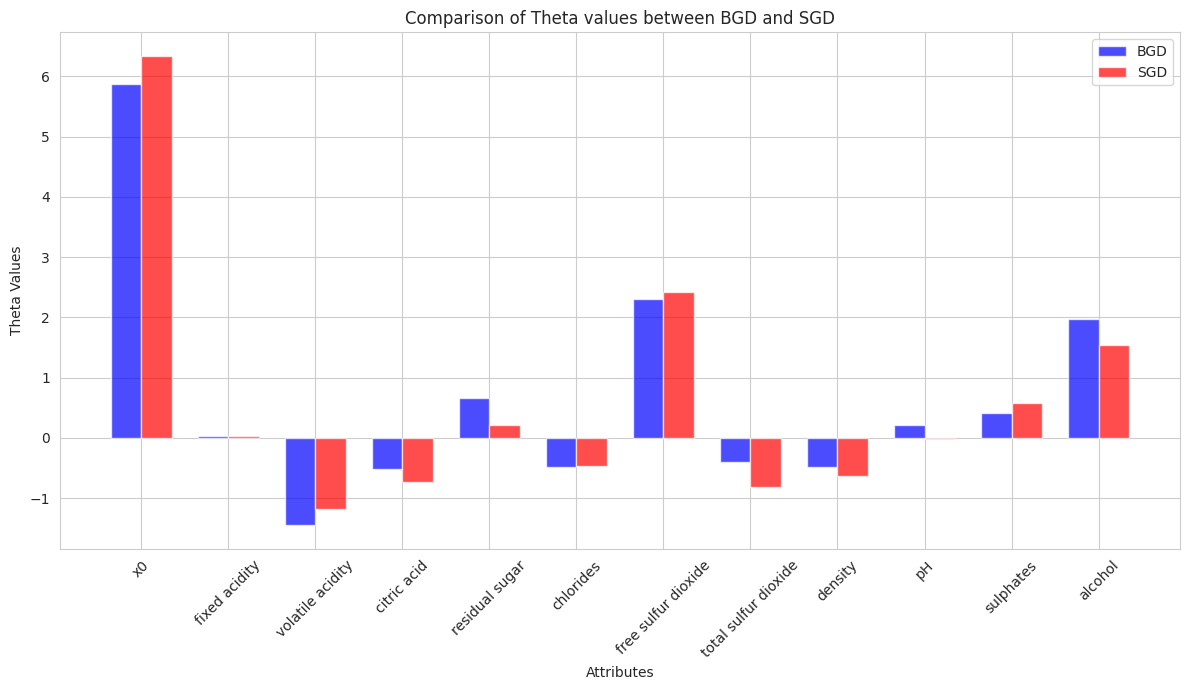

In [ ]:
attributes = theta_bgd.index.tolist()

theta_bgd_values = theta_bgd[0].values
theta_sgd_values = theta_sgd[0].values

bar_width = 0.35
index = np.arange(len(attributes))

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(index, theta_bgd_values, bar_width, label='BGD', color='b', alpha=0.7)
bar2 = ax.bar(index + bar_width, theta_sgd_values, bar_width, label='SGD', color='r', alpha=0.7)

# Labeling and other details
ax.set_xlabel('Attributes')
ax.set_ylabel('Theta Values')
ax.set_title('Comparison of Theta values between BGD and SGD')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(attributes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

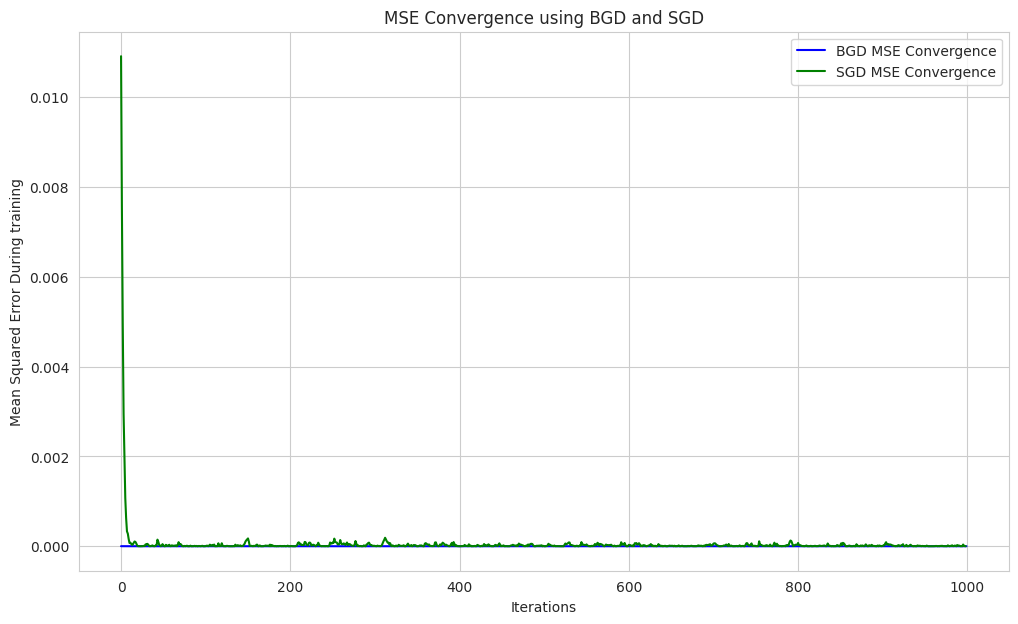

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(mse_history_bgd, label='BGD MSE Convergence', color='b')
plt.plot(mse_history_sgd, label='SGD MSE Convergence', color='g')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error During training')
plt.title('MSE Convergence using BGD and SGD')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
basic_lr = 0.01
lr_bgd_err=[]
lr_sgd_err=[]
lrr=[]
for ii in range(1,20):
  lr = basic_lr * ii
  y = y_test.values.reshape(-1, 1)
  theta_bgd_i, mse_history_bgd_i = BGD(X_train, y_train, lr=basic_lr * ii,n_iterations=1000)
  y_test_pred_bgd_i = X_test.dot(theta_bgd_i)
  mse = compute_mse(y,y_test_pred_bgd_i)
  mse = mse[0].sum()/size_test
  lrr.append(theta_bgd_i)
  lr_bgd_err.append(mse)

  theta_sgd_i, mse_history_sgd_i = SGD(X_train, y_train, lr=lr,lierations=1000)
  y_test_pred_sgd_i = X_test.dot(theta_sgd_i)
  mse = compute_mse(y,y_test_pred_sgd_i)
  mse = mse[0].sum()/size_test
  lr_sgd_err.append(mse)

<Figure size 1200x700 with 0 Axes>

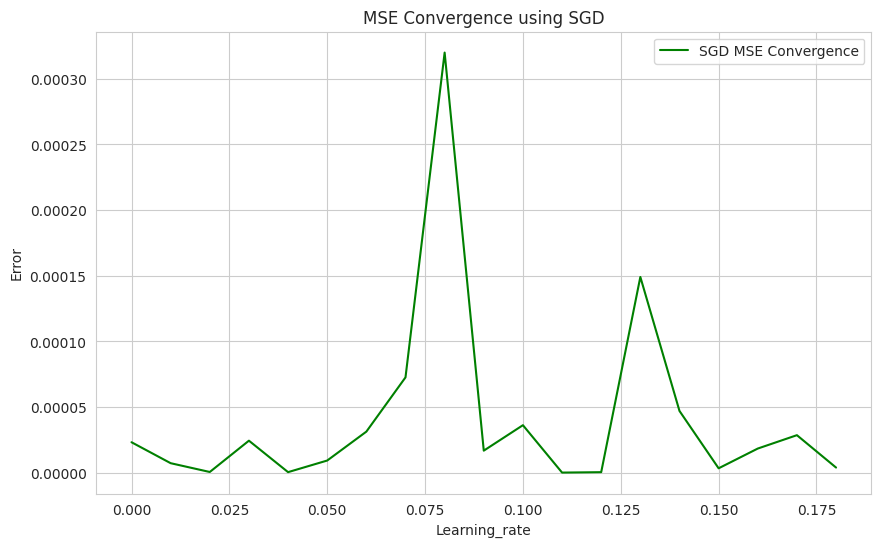

In [ ]:
x_values = [0.01 * i for i in range(len(lr_bgd_err))]
plt.figure(figsize=(12, 7))
plt.figure(figsize=(10, 6))

# 绘制SGD的误差曲线
plt.plot(x_values, lr_sgd_err, label="SGD MSE Convergence", color="green")

plt.xlabel('Learning_rate')
plt.ylabel('Error')
plt.title('MSE Convergence using SGD')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

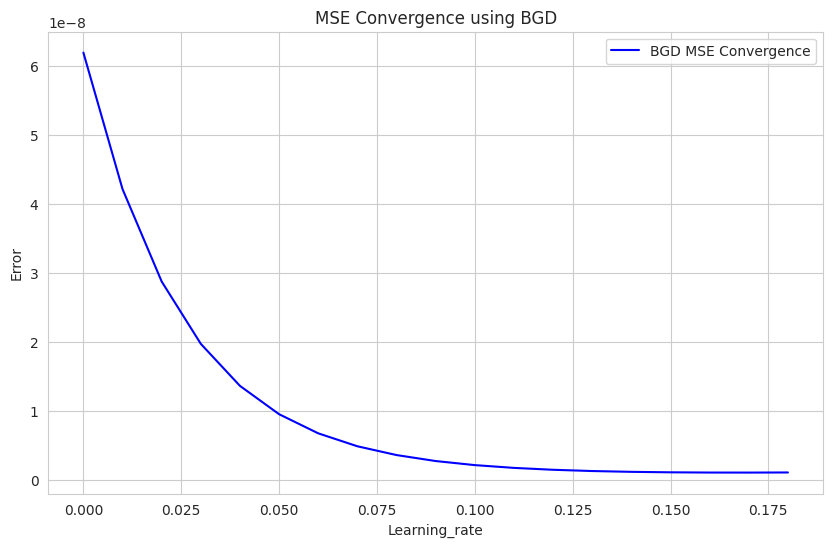

In [ ]:
x_values = [0.01 * i for i in range(len(lr_bgd_err))]
plt.figure(figsize=(12, 7))
plt.figure(figsize=(10, 6))

# 绘制BGD的误差曲线
plt.plot(x_values, lr_bgd_err, label="BGD MSE Convergence", color="blue")


plt.xlabel('Learning_rate')
plt.ylabel('Error')
plt.title('MSE Convergence using BGD')
plt.legend()
plt.grid(True)
plt.show()

# 结果分析

我们从上面的两张图片中可以看出前文讨论的事情：学习率过大或过小都不是好事，都会影响模型最终的收敛效果，我们从两方面讨论这件事情：首先对于SGD，由于每次迭代都是使用单个样本，如果学习率过大，可能导致极端异常样本对于$\theta$的影响变大，模型的效果反而下降；而学习率过小，由于我们设定了一定的迭代次数，当我们达到了迭代次数后，训练就停止了，这就导致了可能在学习率较小的情况下模型没有完全收敛到最优解附近，而是仍处于优化过程中，故对于SGD的图中，我们可以看到，在$lr=0.11$和$lr=0.12$时，收敛效果最好。

而对于BGD，我们可以看到，在我们给出的阈值范围内，其MSE(LOSS)值始终在下降，这说明对于BGD，其对于超参数$lr$的敏感性较弱，或者换言之鲁棒性较强，抗干扰性较强，我们考虑原因：BGD每次使用整个数据集进行训练，每次都在选择近似最优解进行迭代，在这种情况下，没有SGD那样可能存在的随机噪声使其“探索”，但是我们可以料想到，如果$lr$置得过大，梯度更新可能会过于剧烈，导致算法在损失函数的表面上“弹跳”，这样很难收敛到一个好的局部最小值。当然，我们在这里仅展示了在同一学习率的情况下SGD与BGD的对比。


# 统计回归与机器学习回归

我们在前文详细讨论了回归的相关内容，在机器学习中，我们讲究的是有一个目标的损失函数，有对应的训练集，我们通过已有的数据建立一个模型，使其能够在未知数据上具有一定预测的能力；而在统计学中多元回归主要是为了了解和解释变量之间的关系。例如，研究者可能想知道变量 X1、X2 和 X3 如何影响变量 Y，并且可能对各个回归系数、P 值和置信区间等统计特性非常感兴趣。或者换言之，机器学习的目的是应用，解释性稍差，只要模型性能好即可，而统计学要求更加make sense一些。

在统计学中，我们通常使用如 $R^2$、$F-test$、$t-test$ 和 $P$ 值等统计测试来评估模型的质量和变量的重要性；而更侧重于使用如均方误差 (MSE)、均方根误差 (RMSE)、交叉验证等方法来评估模型的预测性能。

此外，正如我们在上一次实验报告中提出的那样，机器学习的本质是数据驱动的联结主义，一般需要大量数据进行优化模型，评估选择，在这个过程中，我们会希望模型具有一定的泛化能力而不完全的过拟合，在这个过程中我们就需要一些额外的技术手段例如L2正则化等方法进行惩罚；而统计学中，不太关注这些，并且其处理的数据量相对较少。

# 岭回归

在上面的讨论中，我们提到过一个概念，正则项，那么岭回归和普通的多元线性回归的主要差异在于岭回归引入了一个L2正则化项。这个正则化项的目的是对模型参数施加某种约束，防止它们达到过大的值。在讨论二者区别之前，我们先考虑正则化的相关内容：

## 正则化

我们考虑正则化：正则化是机器学习和统计建模中的一种技术，用于防止过拟合并提高模型的泛化能力。它通过向模型的损失函数添加一个惩罚项来实现，这个惩罚项对模型的复杂性进行约束。正则化的主要思想是对模型参数施加某种约束，通常是限制其大小，以获得一个简单的模型。可能这样描述很复杂，我们考虑随机梯度下降可能存在的问题：

我们在梯度下降中可能有多种近似解接近最优解，有的解虽然MSE在当前的数据集上较小 但是其参数的值相对较大，那么这种情况可能导致模型对于某些数据异常敏感，而另一些解的参数相对较小，我们加入正则项的目的就是在梯度下降时，尽可能惩罚那些参数较大的情况 鼓励选择参数小的解。这样做的结果体现在了两方面：

- 正则化鼓励选择较小的参数：正则化通过对大的参数值施加惩罚，鼓励算法选择参数较小的解。这样可以使模型对输入变化的响应更为平稳，从而提高泛化能力。

- 模型容量与复杂性：正则化“鼓励”模型选择较小的参数，尽管模型的潜在容量（由其结构决定）没有变，但其有效容量（模型实际表示的函数复杂度）已经被降低了。

接下来我们的问题就在于如何实现正则化：一般而言，正则化分为几种，


1. **L1正则化 (Lasso正则化)**
    - 对模型参数的绝对值进行惩罚。
    - 公式：$ \lambda \sum_{i=1}^n |\theta_i| $
    - 可以导致某些参数为零，从而实现特征选择。
  
2. **L2正则化 (Ridge正则化)**
    - 对模型参数的平方和进行惩罚。
    - 公式：$ \lambda \sum_{i=1}^n \theta_i^2 $
    - 会使所有参数都接近于零，但不完全为零。

3. **弹性网络 (Elastic Net)**
    - 同时使用L1和L2正则化。
    - 具有Lasso和Ridge的特性，有两个正则化参数。
  

我们对Loss上施加对应的正则化后，优化Loss的目的就不仅仅是优化MSE/RMSE了，而是将对应的正则化项同样考虑进去，也需要最小化正则项，那么我们考虑L1和L2对于$\theta$的偏导数：
- 对于L1正则化，其求偏导的结果为一个常数$\lambda$，故对于梯度向量的每一个维度，都减少了一个$\lambda$，直到其变为0为止，那么对于一些不重要的特征，很容易在迭代过程中其系数(权重)被稀释为0，实现特征选择。

- 对于L2正则化，对于第$i$个维度属性，其求偏导的结果为$2\lambda\theta_i$，那么就导致每次迭代的过程，其会减少$2\lambda\theta_i$，当前的参数越大，则梯度减少的越快，那么通过L2正则化便会使迭代过程中所有的参数都接近于0。


那么接下来我们可以讨论多元线性回归和岭回归两者之间的主要差异、岭回归的优点和其背后的动机：

### 差异：
1. **损失函数**：
   - **普通多元线性回归**：目标是最小化均方误差。
   - **岭回归**：目标不仅是最小化均方误差，还要最小化参数的L2范数（平方和）。这是通过在损失函数中添加一个正则化项来实现的。

2. **模型复杂性**：
   - **普通多元线性回归**：不包含任何正则化，可能会产生复杂的模型。
   - **岭回归**：通过正则化，它倾向于产生一个更简单（参数值较小）的模型。

### 岭回归的优点：
1. **稳定性**：在存在多重共线性的情况下，普通的线性回归可能会产生不稳定的参数估计。岭回归通过正则化提高了稳定性。
2. **泛化**：正则化有助于防止过拟合，使模型在未见过的数据上有更好的泛化性能。
3. **解决非满秩问题**：对于某些数据集，特征矩阵可能是近似或完全非满秩的（即列线性相关），这使得普通的线性回归解不稳定或不存在。岭回归通过正则化允许计算一个稳定的解。

岭回归（Ridge Regression），也被称为 Tikhonov 正则化，是线性回归的一种正则化版本。它通过在损失函数中添加一个正则化项来防止过拟合，特别是在存在多重共线性的情况下。

1. **损失函数**：
    岭回归的损失函数包括线性回归的均方误差损失和一个正则化项。公式表示为：
     $$J(\theta)=\frac{1}{n}\sum_{i=1}^n(y_i-h_\theta(\pmb{\mathbf{x_i}}))^2+\lambda \sum_{j=0}^N\theta_j^2 $$
    其中：
    - $ J(\theta) $ 是损失函数。
    - $ X $ 是特征矩阵。
    - $ \theta $ 是参数向量。
    - $ y $ 是目标值向量。
    - $ \lambda $ 是正则化强度参数。

2. **正则化参数**：
    $ \lambda $ 是一个非负值，决定了正则化的强度。当 $ \lambda $ 为 0 时，岭回归就简化为普通的线性回归。随着 $ \lambda $ 的增加，正则化的影响也增加，模型的参数可能会向零收缩，使模型变得更加简单，从而减少过拟合的风险。

3. **多重共线性**：
    在存在多重共线性（特征之间高度相关）的情况下，普通的线性回归可能会产生不稳定的参数估计。岭回归通过添加正则化来减轻这一问题，提供更稳定和可解释的参数估计。

4. **参数估计**：
    与普通的线性回归不同，岭回归的参数估计不再是无偏的。但是，由于正则化，它们通常具有较小的方差，从而可能提供更好的预测性能，尤其是在存在多重共线性或数据点较少的情况下。

5. **计算**：
    岭回归的优点之一是它具有解析解，可以直接计算。但与普通的线性回归解析解不同，岭回归考虑了正则化项。


那么我们可以summary一下，岭回归是一个在机器学习和统计学中都非常受欢迎的方法，其原理相对简单，不过是在普通的Loss中添加一个 L2 正则化项来增强线性回归的稳定性和预测能力。

In [1]:
# 实现岭回归
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)) ** 2
def SGD_Rigde(X,y,lr=0.05,lambda_=0.15,lierations=1000):
  m, n = X.shape
  theta = theta_init
  mse_history = []
  y = y.values.reshape(-1, 1)
  for i in range(1,lierations):
    random_index = np.random.randint(m)
    xi = X[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) + 2 * lambda_ * theta
    theta -= lr * gradients
    y_pred = X.dot(theta)
    mse = compute_mse(y, y_pred)
    mse = mse[0].sum()/m
    mse_history.append(mse)

  return theta, mse_history

In [ ]:
theta_sgd_ridge, mse_history_sgd_rigde = SGD_Rigde(X_train, y_train, lr=0.1,lierations=1000)

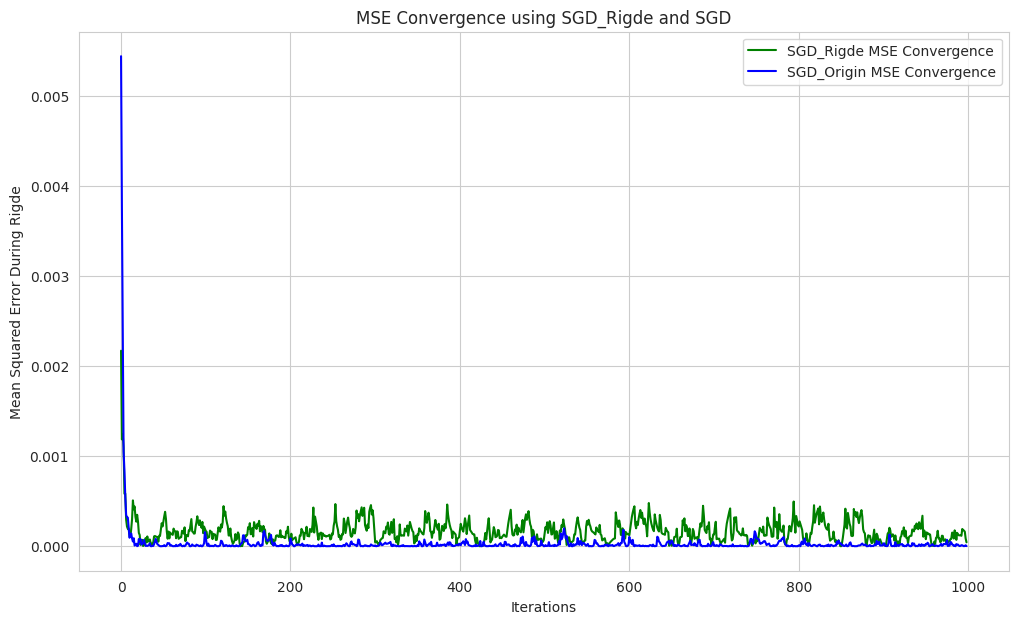

In [22]:
# 与普通SGD对比

plt.figure(figsize=(12, 7))

plt.plot(mse_history_sgd_rigde, label='SGD_Rigde MSE Convergence', color='g')
plt.plot(mse_history_sgd, label='SGD_Origin MSE Convergence', color='b')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error During Rigde')
plt.title('MSE Convergence using SGD_Rigde and SGD')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
y_test_pred_sgd = X_test.dot(theta_sgd)
y_test_pred_sgd_ridge = X_test.dot(theta_sgd_ridge)
y = y_test.values.reshape(-1, 1)
mse_sgd = compute_mse(y,y_test_pred_sgd)
mse_sgd = mse_sgd[0].sum()/size_test
mse_sgd_ridge = compute_mse(y,y_test_pred_sgd_ridge)
mse_sgd_ridge = mse_sgd_ridge[0].sum()/size_test
mse_sgd,mse_sgd_ridge

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(4.849550305626001e-06, 0.00017172866521573626)

上图中展示了两种模型：原始的SGD（SGD_Origin）和带L2正则化的SGD（SGD_Ridge）在训练过程中的MSE（均方误差）收敛情况。

从图中可以观察到以下几个现象：

1. **初始MSE差异**：在训练开始时，SGD_Ridge的MSE显著高于SGD_Origin。这可能是因为Ridge正则化初期增加了额外的惩罚，导致误差增加。
  
2. **快速收敛**：在最初的几次迭代后，两者的MSE都迅速下降并稳定。

3. **稳定后的波动**：在后续的迭代中，两者的MSE都显示出相对较小的波动。这是随机梯度下降的典型特征，因为它在每次迭代中只使用一个样本来更新权重，这导致了较大的方差和这种波动性。

4. **MSE接近值**：在大部分迭代中，两者的MSE非常接近，但SGD_Ridge的MSE稍微高一些。这可能是因为正则化引入了对模型复杂度的约束，这可能导致模型对训练数据的拟合略差一些，但可能会提高其泛化能力。

我们考虑为什么会出现上述现象？给出以下三点可能的原因

1. **正则化的影响**：Ridge正则化会对模型参数施加额外的约束，使得它们在训练过程中趋向于较小的值。这可以使模型更为简单，减少过拟合的风险，但也可能导致训练误差略高。

2. **随机梯度下降的特性**：由于SGD在每次迭代时只使用一个样本，它的收敛过程比批量梯度下降更加嘈杂。这解释了为什么我们在图中看到MSE有这么多的波动。

3. **初始化的影响**：模型的初始参数可能会影响训练的开始阶段，这解释了为什么两种方法在最初的MSE上有所不同。

我们考虑可能Ridge的泛化能力要好一些，我们使用测试集进行测试，结果发现仍然是Origin算法的结果要更好一些，我们考虑这个实验现象的原因：

- 数据量太少：当训练数据量太少时，模型可能没有足够的信息来学习数据的真实分布，导致正则化对应的模型出现欠拟合。

- 数据的质量问题：可能存在噪声、异常值或其他问题，这些问题在训练数据中未被处理。

- 特征工程：使用的特征可能不足以描述数据的复杂性或与目标变量有足够的关联。

- 模型结构或参数不合适：我们选择的正则化强度和学习率并没有经过精细的调优，所以可能导致当前模型的效果可能不是最佳状态



# 实验总结

本次实验中，我们详细推导描述了多元线性回归的原理，并实现了BGD，SGD优化参数，我们实现的SGD是一个较为简单的版本，在后续的过程中，可以加入early-stop，learning_rate decrease等tricks进一步优化迭代效果，进而提高模型的准确率。

此外，我们详细给出了正则化的原理，岭回归与多元线性回归的区别，并使用SGD进行了岭回归，与SGD的结果进行了定性的分析操作，总的来看，本次实验较为成功！